In [1]:
import sys
sys.path.append("../mypkg")

In [2]:
from constants import RES_ROOT, FIG_ROOT, DATA_ROOT
from utils.misc import load_pkl, save_pkl, merge_intervals
from utils.colors import qual_cmap
from utils.stats import weighted_quantile
from data_gen import get_simu_data
from demo_settings import simu_settings

In [3]:
%load_ext autoreload
%autoreload 2
# 0,1, 2, 3, be careful about the space

In [4]:
import torch
import scipy.stats as ss
import numpy as np
from easydict import EasyDict as edict
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict as ddict
from tqdm import tqdm, trange
import random
from joblib import Parallel, delayed
import pandas as pd
from pprint import pprint
plt.style.use(FIG_ROOT/"base.mplstyle")

In [15]:
data = ddict(list)
for st_idx in range(1, 9):
    test_ress = load_pkl(RES_ROOT/f"demo_setting{st_idx}_sc1a/res_demo.pkl")
    for res in test_ress:
        for ky, v in res.items():
            data["ITE prob"].append(v[0][0])
            data["CATE prob"].append(v[0][1])
            data["len of CI"].append(v[1])
            data["method"].append(ky)
            data["setting"].append(f"setting{st_idx}")

Load file /data/rajlab1/user_data/jin/MyResearch/DG-CITE_paper/notebooks/../mypkg/../results/demo_setting1_sc1a/res_demo.pkl
Load file /data/rajlab1/user_data/jin/MyResearch/DG-CITE_paper/notebooks/../mypkg/../results/demo_setting2_sc1a/res_demo.pkl
Load file /data/rajlab1/user_data/jin/MyResearch/DG-CITE_paper/notebooks/../mypkg/../results/demo_setting3_sc1a/res_demo.pkl
Load file /data/rajlab1/user_data/jin/MyResearch/DG-CITE_paper/notebooks/../mypkg/../results/demo_setting4_sc1a/res_demo.pkl
Load file /data/rajlab1/user_data/jin/MyResearch/DG-CITE_paper/notebooks/../mypkg/../results/demo_setting5_sc1a/res_demo.pkl
Load file /data/rajlab1/user_data/jin/MyResearch/DG-CITE_paper/notebooks/../mypkg/../results/demo_setting6_sc1a/res_demo.pkl
Load file /data/rajlab1/user_data/jin/MyResearch/DG-CITE_paper/notebooks/../mypkg/../results/demo_setting7_sc1a/res_demo.pkl
Load file /data/rajlab1/user_data/jin/MyResearch/DG-CITE_paper/notebooks/../mypkg/../results/demo_setting8_sc1a/res_demo.pkl


In [6]:
data = ddict(list)
for st_idx in range(3, 5):
    for d in [10, 100, 1000]:
        test_ress = load_pkl(RES_ROOT/f"demo_ddpm_setting{st_idx}_d{d}_sc1b/res_demo.pkl")
        for res in test_ress:
            for ky, v in res.items():
                data["ITE prob"].append(v[0][0])
                data["CATE prob"].append(v[0][1])
                data["len of CI"].append(v[1])
                data["method"].append(ky)
                data["setting"].append(f"setting{st_idx}_d{d}")

Load file /data/rajlab1/user_data/jin/MyResearch/DG-CITE_paper/notebooks/../mypkg/../results/demo_ddpm_setting3_d10_sc1b/res_demo.pkl
Load file /data/rajlab1/user_data/jin/MyResearch/DG-CITE_paper/notebooks/../mypkg/../results/demo_ddpm_setting3_d100_sc1b/res_demo.pkl
Load file /data/rajlab1/user_data/jin/MyResearch/DG-CITE_paper/notebooks/../mypkg/../results/demo_ddpm_setting3_d1000_sc1b/res_demo.pkl
Load file /data/rajlab1/user_data/jin/MyResearch/DG-CITE_paper/notebooks/../mypkg/../results/demo_ddpm_setting4_d10_sc1b/res_demo.pkl
Load file /data/rajlab1/user_data/jin/MyResearch/DG-CITE_paper/notebooks/../mypkg/../results/demo_ddpm_setting4_d100_sc1b/res_demo.pkl
Load file /data/rajlab1/user_data/jin/MyResearch/DG-CITE_paper/notebooks/../mypkg/../results/demo_ddpm_setting4_d1000_sc1b/res_demo.pkl


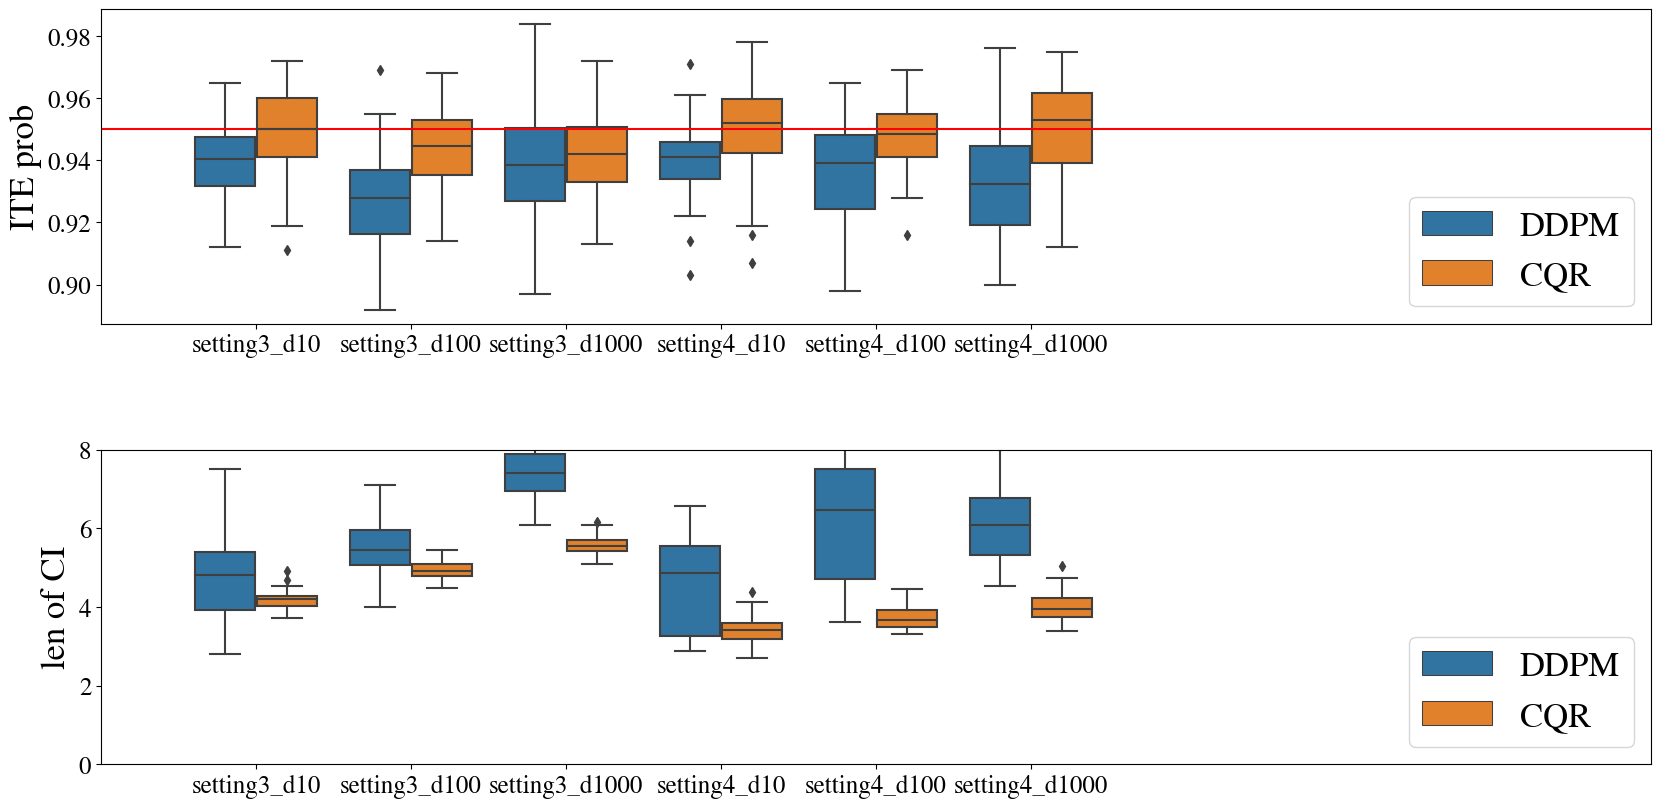

In [13]:
plt.figure(figsize=[20, 10])
df = pd.DataFrame(data)

plt.subplot(211)
sns.boxplot(data=df, y="ITE prob", hue="method", x="setting")
plt.axhline(y=0.95, color="red");
plt.xlim([-1, 9])
plt.xlabel("")
plt.legend(loc="lower right")

#plt.subplot(312)
#sns.boxplot(data=df, y="CATE prob", hue="method", x="setting")
#plt.axhline(y=0.95, color="red");
#plt.xlim([-1, 9])
#plt.xlabel("")
#plt.legend(loc="lower right")

plt.subplot(212)
sns.boxplot(data=df, y="len of CI", hue="method", x="setting", showfliers=True)
plt.xlim([-1, 9])
plt.ylim([0, 8])
plt.xlabel("")
plt.legend(loc="lower right");

#plt.savefig(FIG_ROOT/"demo.jpg")